In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf1 = pd.read_csv('../TestResults/Test_Baseline_50_1000.csv')
tf2 = pd.read_csv('../TestResults/Test_Baseline_1000_1000.csv')
tf3 = pd.read_csv('../TestResults/Test_Baseline_5000_1000.csv')

In [3]:
def renameCat(res):
    res={key.split('_')[0]:val for key,val in res.items()}
    return res

In [4]:
#False Positive testing
#bloomfilter
def calcHitpercentage(algo,tf):
    bloom1 = tf.loc[tf['Algorithm']==algo]
    categories=list(bloom1)[4:]
    bloom1_cate=bloom1[categories]
    bloom1['Max'] = bloom1_cate.idxmax(axis=1)
    bloom1_res={}
    for cat in categories:
        bloom1_res[cat]=0
    for index,rows in bloom1[['originalCategory','Max']].iterrows():
        if rows['originalCategory'] not in bloom1_res:
            bloom1_res[rows['originalCategory']]=0
        if rows['originalCategory']== rows['Max']:
            bloom1_res[rows['originalCategory']]+=1
    print(len(list(bloom1_res.keys())))
    #bloom1_res1={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items() if val >0}
    for key,val in bloom1_res.items():
        if val >0:
            bloom1_res[key]=val/len(bloom1.loc[bloom1['originalCategory']==key])
    return bloom1_res
res01=renameCat(calcHitpercentage('LSI',tf1))
res02=renameCat(calcHitpercentage('LSI',tf2))
res03=renameCat(calcHitpercentage('LSI',tf3))



27
27
27


In [5]:
def calcRangeHit(algo,tf):
    a = tf.loc[tf['Algorithm']==algo]
    categories=list(a)[4:]
    a_cate=a[categories]
    a['Max'] = a_cate.idxmax(axis=1)
    a_res={}
    for cat in categories:
        a_res[cat]=0
    for index,rows in a.iterrows():
        max_val=rows[rows['Max']]
        th_val=max_val*0.8
        test = [col for col,val in rows[categories].iteritems() if val>=th_val]
        #print(rows['originalCategory'],test)
        if rows['originalCategory'] not in a_res:
            a_res[rows['originalCategory']]=0
        if rows['originalCategory'] in test:
            a_res[rows['originalCategory']]+=1
    for key,val in a_res.items():
        if val >0:
            a_res[key]=val/len(a.loc[a['originalCategory']==key])
    return a_res

In [6]:
Rh_res01 = renameCat(calcRangeHit('LSI',tf1))
Rh_res02 = renameCat(calcRangeHit('LSI',tf2))
Rh_res03 = renameCat(calcRangeHit('LSI',tf3))



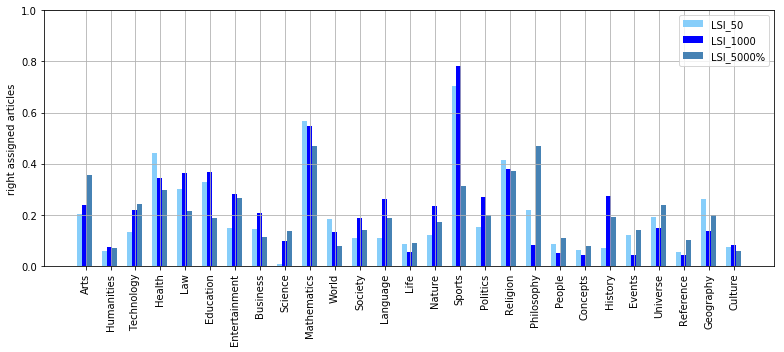

In [7]:
ind = np.arange(len(res01))    # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))



p1 = ax.bar(ind-width,list(res01.values()),width, align='center',color='lightskyblue')
p2 = ax.bar(ind,list(res02.values()),width, align='center',color='blue')
p3 = ax.bar(ind+width,list(res03.values()),width, align='center',color='steelblue')



ax.set_xticks(ind + width / 6)
ax.set_xticklabels(list(res01.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0]), ('LSI_50', 'LSI_1000','LSI_5000%'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_LSI.png',dpi=500)
plt.show()

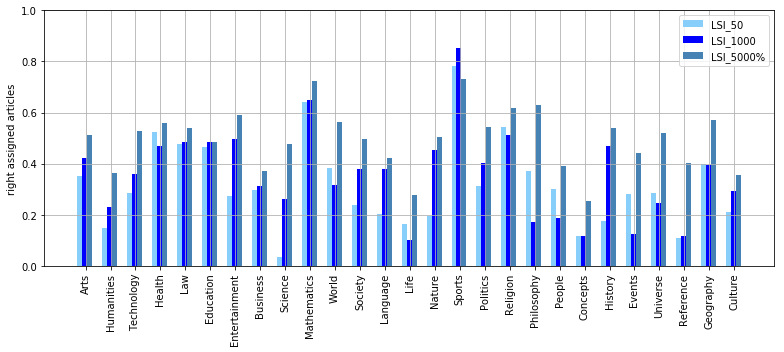

In [8]:
ind = np.arange(len(Rh_res01))    # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))



p1 = ax.bar(ind-width,list(Rh_res01.values()),width, align='center',color='lightskyblue')
p2 = ax.bar(ind,list(Rh_res02.values()),width, align='center',color='blue')
p3 = ax.bar(ind+width,list(Rh_res03.values()),width, align='center',color='steelblue')



ax.set_xticks(ind + width / 6)
ax.set_xticklabels(list(Rh_res01.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0]), ('LSI_50', 'LSI_1000','LSI_5000%'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_LSI_range.png',dpi=500)
plt.show()

In [9]:

res_acc = np.array([[val for key,val in res01.items()],[val for key,val in res02.items()],[val for key,val in res03.items()]])
print(res_acc.mean(axis=1))     # to take the mean of each col
print(res_acc.std(axis=1))     # to take the std of

list(res_acc.std(axis=1))

[0.19766435 0.21997252 0.20306127]
[0.16365278 0.16816825 0.11313208]


[0.16365277890653324, 0.16816824764358093, 0.11313207623787966]

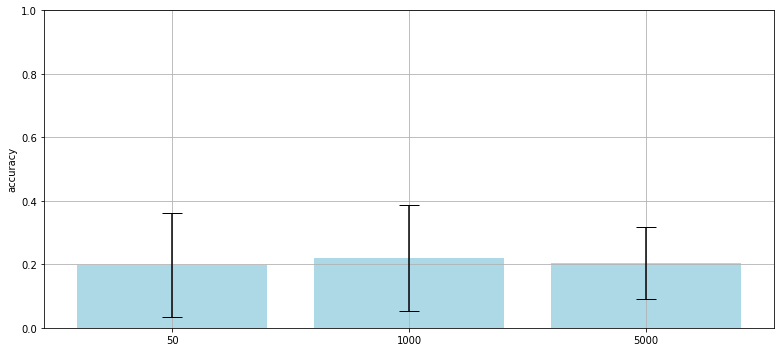

In [10]:
ind = np.arange(3)    # the x locations for the groups
width = 0.2         # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))


p1 = ax.bar(ind,list(res_acc.mean(axis=1)),yerr=list(res_acc.std(axis=1)), align='center',color='lightblue',ecolor='black',capsize=10)
#ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)


ax.set_xticks(ind)
ax.set_xticklabels(['50','1000','5000'],rotation='horizontal')
#ax.legend((p1[0], p2[0], p3[0],p4[0]), ('bloomfilter_50_20%', 'bloomfilter_50_40%','bloomfilter_50_70%','bloomfilter_50_100%'))
ax.set_ylim([0,1])
ax.set_ylabel('accuracy')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/hitaccuracy_LSI.png',dpi=500)

plt.show()